In [27]:
import pandas as pd

In [28]:
import seaborn as sns

In [29]:
import matplotlib.pyplot as plt

In [30]:
df = sns.load_dataset('titanic')

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
print("Dataset shape:", df.shape)

Dataset shape: (891, 15)


In [33]:
print("\nColumn info:")


Column info:


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [36]:
df = df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'])

In [37]:
df['age'] = df['age'].fillna(df['age'].median())

In [38]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [39]:
print(df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [40]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='survived', ylabel='count'>

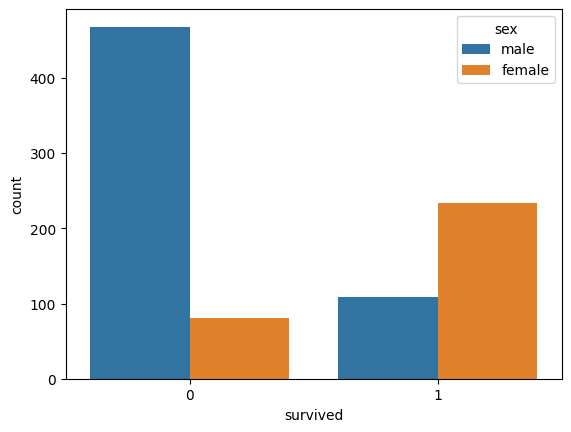

In [41]:
sns.countplot(x='survived', hue='sex', data=df)

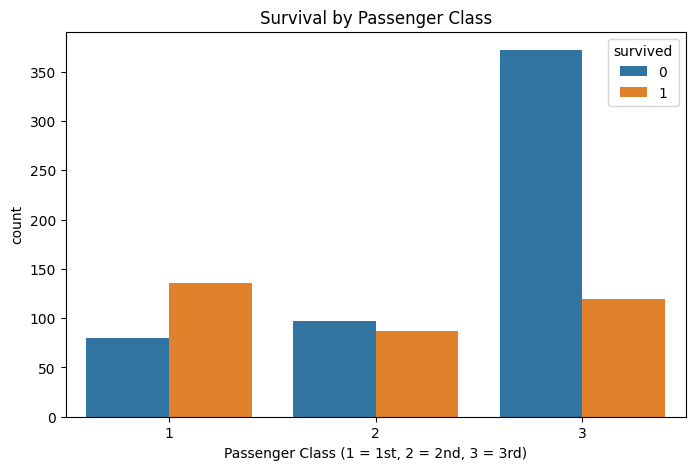

In [42]:

plt.figure(figsize=(8,5))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.show()

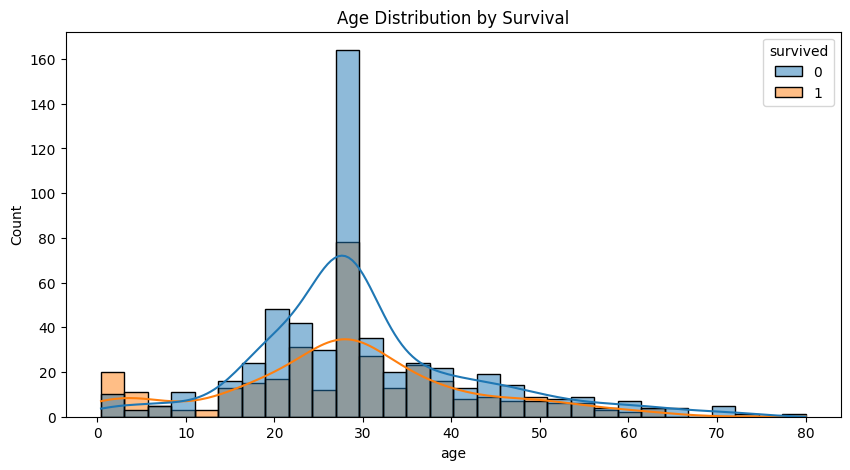

In [43]:
# 4. Age distribution by survival
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

In [44]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['survived'])
y = df['survived']

# Show final features
print("Features used for modeling:")
print(X.columns.tolist())

Features used for modeling:
['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred = nb_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("🎯 Naive Bayes Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

🎯 Naive Bayes Results
Accuracy: 0.771

Confusion Matrix:
[[84 21]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [47]:
# 🔹 Predict for a New Passenger (Example 1)
print("\n" + "="*50)
print("🔮 NAIVE BAYES: PREDICT FOR NEW PASSENGER")
print("="*50)

# Define a new passenger: 30-year-old male, 3rd class, no family, fare=10, embarked=S
new_passenger = pd.DataFrame({
    'pclass': [3],
    'age': [30],
    'sibsp': [0],
    'parch': [0],
    'fare': [10],
    'sex_male': [1],      # 1 = male
    'embarked_Q': [0],    # 0 = not Queenstown
    'embarked_S': [1]     # 1 = Southampton (so embarked = S)
})

# Reorder columns to match training data
new_passenger = new_passenger.reindex(columns=X.columns, fill_value=0)

# Make prediction
predicted_class = nb_model.predict(new_passenger)[0]
survival_prob = nb_model.predict_proba(new_passenger)[0][1]

# Display result
print(f"\nNew Passenger Profile:")
print(f"  - Age: 30")
print(f"  - Sex: Male")
print(f"  - Class: 3rd")
print(f"  - Fare: £10")
print(f"  - Embarked: Southampton (S)")

print(f"\n➡️ Naive Bayes Prediction:")
print(f"  - Outcome: {'Survived' if predicted_class == 1 else 'Died'}")
print(f"  - Survival Probability: {survival_prob:.2%}")


🔮 NAIVE BAYES: PREDICT FOR NEW PASSENGER

New Passenger Profile:
  - Age: 30
  - Sex: Male
  - Class: 3rd
  - Fare: £10
  - Embarked: Southampton (S)

➡️ Naive Bayes Prediction:
  - Outcome: Died
  - Survival Probability: 4.03%
